**Project 2 - Person Tracking**

**Faster RCNN**

Widya

**Dataset: Coco-2017**

In [1]:
pip install --upgrade pip

In [2]:
!pip install fiftyone

In [3]:
import fiftyone as fo
import fiftyone.zoo as foz
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
foz.list_zoo_datasets()

['activitynet-100',
 'activitynet-200',
 'bdd100k',
 'caltech101',
 'caltech256',
 'cifar10',
 'cifar100',
 'cityscapes',
 'coco-2014',
 'coco-2017',
 'fashion-mnist',
 'fiw',
 'hmdb51',
 'imagenet-2012',
 'imagenet-sample',
 'kinetics-400',
 'kinetics-600',
 'kinetics-700',
 'kinetics-700-2020',
 'kitti',
 'kitti-multiview',
 'lfw',
 'mnist',
 'open-images-v6',
 'open-images-v7',
 'places',
 'quickstart',
 'quickstart-3d',
 'quickstart-geo',
 'quickstart-groups',
 'quickstart-video',
 'sama-coco',
 'ucf101',
 'voc-2007',
 'voc-2012']

In [5]:
datasets = foz.load_zoo_dataset('coco-2017', splits=('train', 'validation', 'test'), classes=['person'], progress=True, max_samples=200)
datasets

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/coco-2017/test' if necessary


Test split is unlabeled; ignoring classes requirement


Found test info at '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Found test info at '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'test' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'test' is sufficient


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |█████████████████| 200/200 [1.1s elapsed, 0s remaining, 176.6 samples/s]         


INFO:eta.core.utils: 100% |█████████████████| 200/200 [1.1s elapsed, 0s remaining, 176.6 samples/s]         


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 200/200 [1.3s elapsed, 0s remaining, 157.2 samples/s]         


INFO:eta.core.utils: 100% |█████████████████| 200/200 [1.3s elapsed, 0s remaining, 157.2 samples/s]         


Loading 'coco-2017' split 'test'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'test'


Dataset is unlabeled; ignoring classes requirement


 100% |█████████████████| 200/200 [67.2ms elapsed, 0s remaining, 3.0K samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 200/200 [67.2ms elapsed, 0s remaining, 3.0K samples/s]      


Dataset 'coco-2017-train-validation-test-200' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-validation-test-200' created


Name:        coco-2017-train-validation-test-200
Media type:  image
Num samples: 600
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [6]:
#datasets = foz.load_zoo_dataset('coco-2017', splits=('train', 'validation', 'test'), classes=['person'], progress=True, max_samples=200)
#datasets

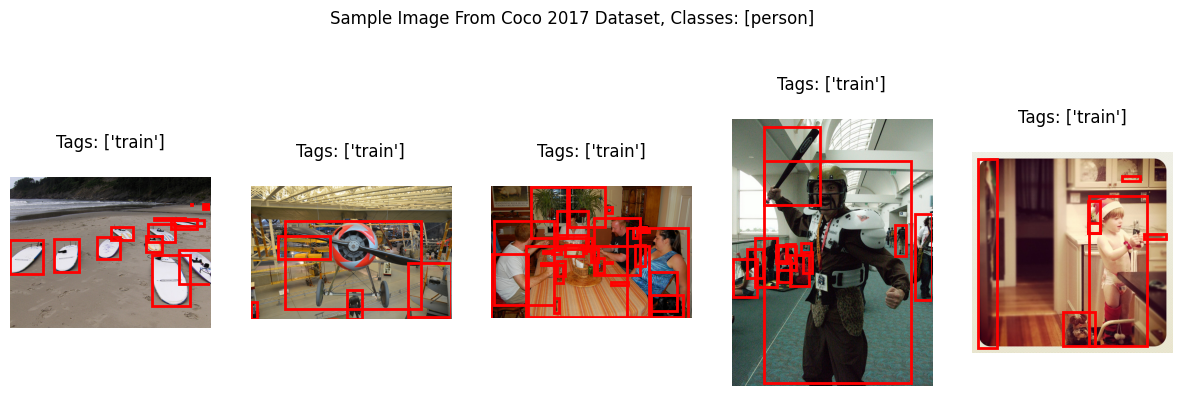

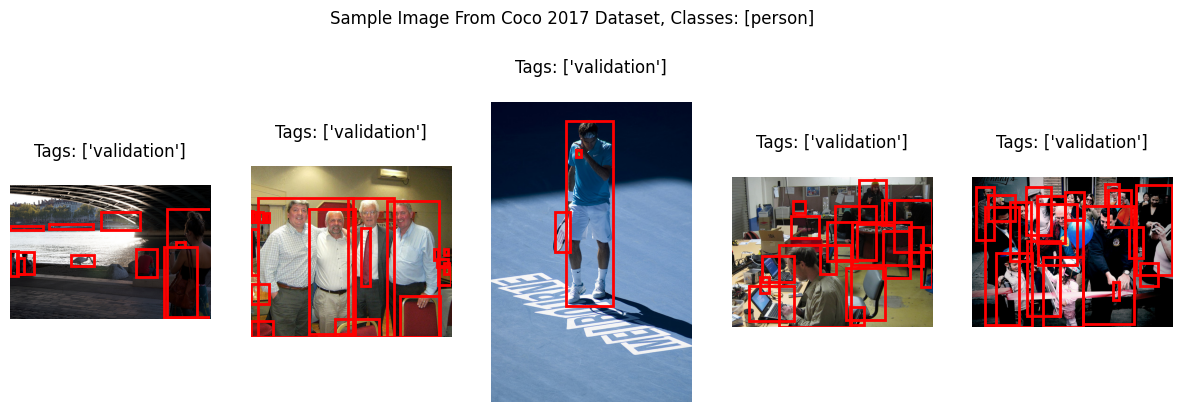

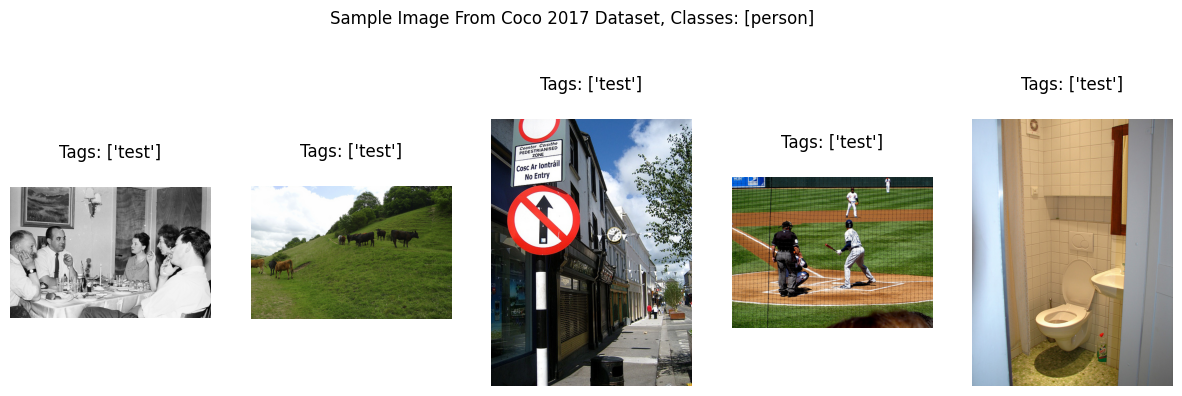

In [7]:
def show_sample(split_view):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle("Sample Image From Coco 2017 Dataset, Classes: [person]")
    i = 1
    for d in split_view.take(5):
        ax = fig.add_subplot(1, 5, i)
        ax.set_title(f"Tags: {d.tags}\n")
        img = plt.imread(d.filepath)
        ax.imshow(img)
        ax.axis('off')
        i += 1

        # Skip for testing data
        if d.ground_truth is None:
            continue

        for detection in d.ground_truth.detections:
            x, y, w, h = detection.bounding_box
            image_height, image_width, _ = img.shape
            x1 = x * image_width
            y1 = y * image_height
            x2 = x1 + (w * image_width)
            y2 = y1 + (h * image_height)
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

for split in ['train', 'validation', 'test']:
    split_view = datasets.match_tags(split)
    show_sample(split_view)

## Start Training

In [8]:
!pip -q install utils

In [9]:
import matplotlib.pyplot as plt
import cv2
import os
import torch
from PIL import Image
import numpy as np
from torch.utils.data import Dataset
from pycocotools.coco import COCO

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)


cuda


In [10]:
import matplotlib.pyplot as plt
import cv2
import os
import torch
from PIL import Image
import numpy as np
from torch.utils.data import Dataset
from pycocotools.coco import COCO

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

# Custom PyTorch Dataset to load COCO-format annotations and images
class CocoDetectionDataset(Dataset):
    # Init function: loads annotation file and prepares list of image IDs
    def __init__(self, image_dir, annotation_path, transforms=None):
        self.image_dir = image_dir
        self.coco = COCO(annotation_path)
        self.image_ids = list(self.coco.imgs.keys())
        self.transforms = transforms

        # Find the category ID for 'person' in the loaded COCO annotations
        self.person_coco_id = None
        for cat_id, cat_info in self.coco.cats.items():
            if cat_info['name'] == 'person':
                self.person_coco_id = cat_id
                break

        if self.person_coco_id is None:
            raise ValueError("Person category not found in COCO annotations file.")

    # Returns total number of images
    def __len__(self):
        return len(self.image_ids)

    # Fetches a single image and its annotations
    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_info = self.coco.loadImgs(image_id)[0]
        image_path = os.path.join(self.image_dir, image_info['file_name'])
        image = Image.open(image_path).convert("RGB")

        # Load all annotations for this image
        annotation_ids = self.coco.getAnnIds(imgIds=image_id)
        annotations = self.coco.loadAnns(annotation_ids)

        # Extract bounding boxes and labels from annotations
        boxes = []
        labels = []
        areas = []
        iscrowds = []

        for obj in annotations:
            # Only process annotations for the 'person' class
            if obj['category_id'] == self.person_coco_id:
                xmin, ymin, width, height = obj['bbox']
                xmax = xmin + width
                ymax = ymin + height
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(1)  # Map 'person' to class ID 1 (0 is background)
                areas.append(obj['area'])
                iscrowds.append(obj.get('iscrowd', 0))

        # Convert annotations to PyTorch tensors
        if not boxes: # Handle cases where an image might have no person annotations
            boxes = torch.empty((0, 4), dtype=torch.float32)
            labels = torch.empty((0,), dtype=torch.int64)
            area = torch.empty((0,), dtype=torch.float32)
            iscrowd = torch.empty((0,), dtype=torch.int64)
        else:
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)
            area = torch.as_tensor(areas, dtype=torch.float32)
            iscrowd = torch.as_tensor(iscrowds, dtype=torch.int64)

        # Package everything into a target dictionary
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        # Apply transforms if any were passed
        if self.transforms:
            image = self.transforms(image)

        return image, target

cuda


**Create train and validation sets**
---



In [11]:
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

# Returns a simple transform that converts a PIL image to a PyTorch tensor
def get_transform():
    return ToTensor()

# Load training dataset with transform applied
#train_dataset = CocoDetectionDataset(
    # Change this to your path
    #image_dir="football-players-detection/train",
    #annotation_path="football-players-detection/train/_annotations.coco.json",
#    transforms=get_transform()
#)

train_dataset = CocoDetectionDataset(
    # Change this to your path
    image_dir="/root/fiftyone/coco-2017/train/data",
    annotation_path="/root/fiftyone/coco-2017/train/labels.json",
    transforms=get_transform()
)

# Load validation dataset with same transform
#val_dataset = CocoDetectionDataset(
    #image_dir="football-players-detection/valid",
    #annotation_path="football-players-detection/valid/_annotations.coco.json",
    #transforms=get_transform()
#)

val_dataset = CocoDetectionDataset(
    image_dir="/root/fiftyone/coco-2017/validation/data",
    annotation_path="/root/fiftyone/coco-2017/validation/labels.json",
    transforms=get_transform()
)



# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


**Visualizing Annotations on Sample Images from the DataLoader**

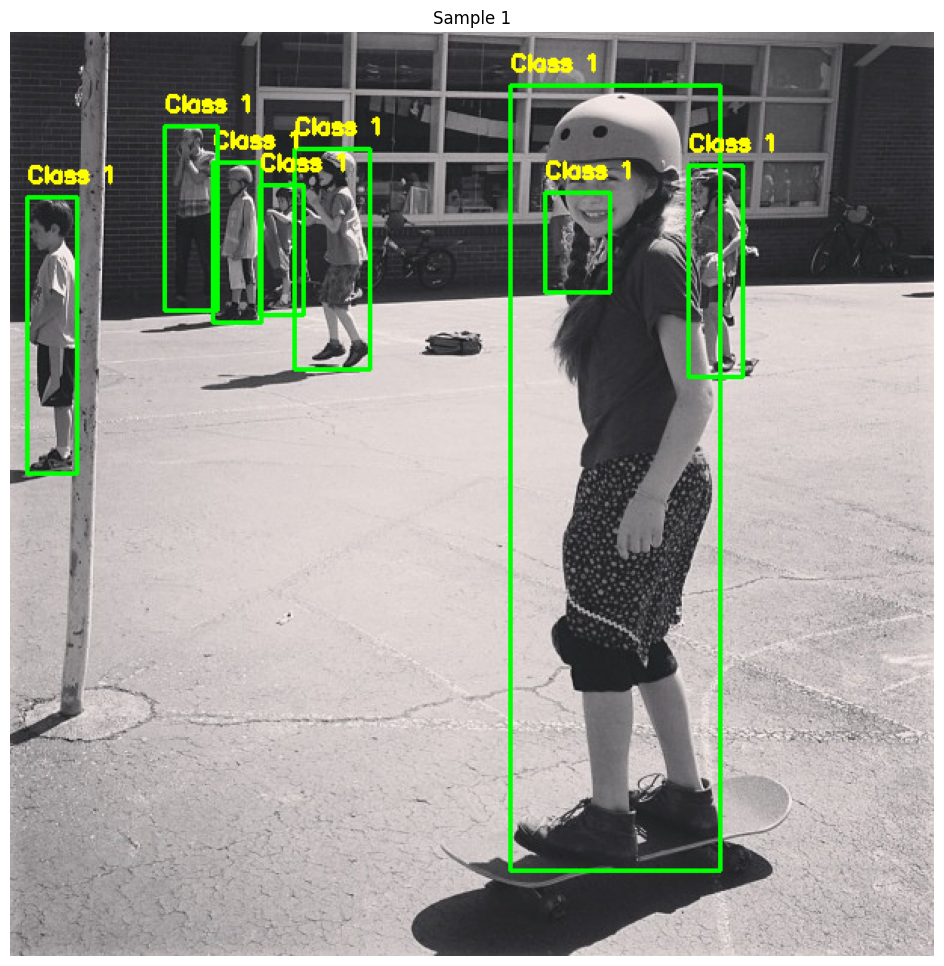

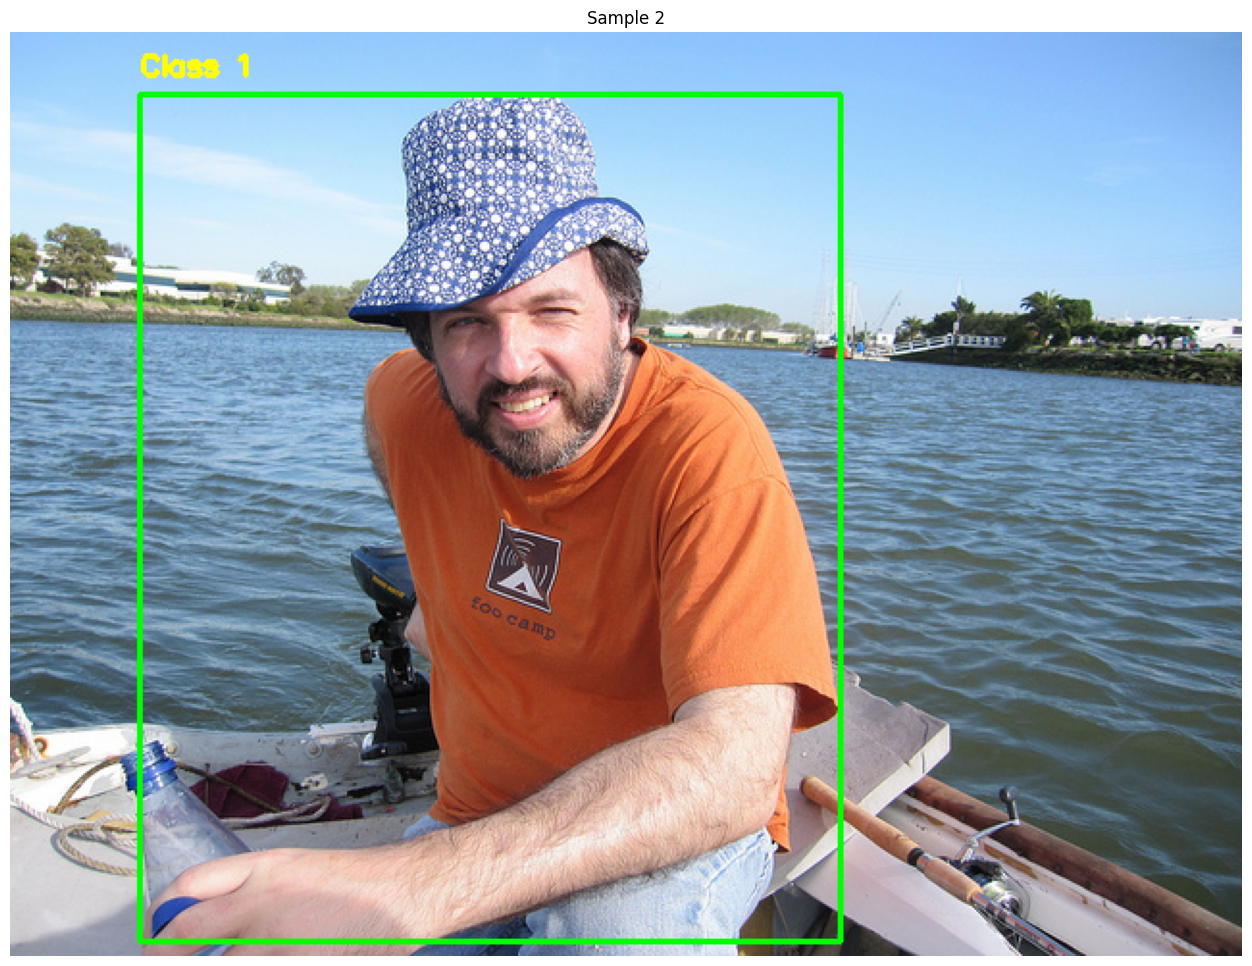

In [12]:
# Get one batch from the DataLoader
images, targets = next(iter(train_loader))

# Convert PIL Image and draw annotations
for i in range(len(images)):
    image = images[i].permute(1, 2, 0).numpy()  # Convert from CxHxW to HxWxC
    image = (image * 255).astype(np.uint8)  # Rescale
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    boxes = targets[i]['boxes']
    labels = targets[i]['labels']

    for box, label in zip(boxes, labels):
        x1, y1, x2, y2 = map(int, box.tolist())
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"Class {label.item()}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

    # Show image with boxes using matplotlib
    plt.figure(figsize=(16, 12))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Sample {i + 1}")
    plt.show()

In [13]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

# Load a pre-trained Faster R-CNN model with ResNet50 backbone and FPN
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Get the number of classes from the dataset (including background)
# For 'person' detection, we expect 2 classes (background + person).
# The dataset's `num_classes` might incorrectly evaluate to 81 due to metadata interpretation.
# We explicitly set it to 2 here to match the intention of single-class detection.
num_classes = 2 # This should be 2 (background + person) based on the dataset's filtering

# Get the number of input features for the classifier head
in_features = model.roi_heads.box_predictor.cls_score.in_features

"""
Replace the classifier head with a new one for the custom dataset's classes
Number of classes must be equal to your label number
"""
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Move the model to the specified device (GPU or CPU)
model.to(device)

cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

**Setting Optimizer**

In [14]:
# Get parameters that require gradients (the model's trainable parameters)
params = [p for p in model.parameters() if p.requires_grad]

# Define the optimizer (Stochastic Gradient Descent) with learning rate, momentum, and weight decay
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

**Cloning Pytorch**

In [15]:
# Clone the PyTorch vision repository
!git clone https://github.com/pytorch/vision.git

# Navigate to the 'vision' directory and copy necessary detection-related utility files
!cd vision; cp references/detection/utils.py ../;  # Copy utility functions
!cd vision; cp references/detection/transforms.py ../;  # Copy image transformation functions
!cd vision; cp references/detection/coco_eval.py ../;  # Copy COCO evaluation script
!cd vision; cp references/detection/engine.py ../;  # Copy engine code for training/evaluation
!cd vision; cp references/detection/coco_utils.py ../;  # Copy COCO-specific utility functions

fatal: destination path 'vision' already exists and is not an empty directory.


**Training**

In [16]:
from engine import train_one_epoch, evaluate


# Set the number of epochs for training
num_epochs = 5

# Loop through each epoch
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")

    # Train the model for one epoch, printing status every 25 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=25)  # Using train_loader for training

    # Evaluate the model on the validation dataset
    evaluate(model, val_loader, device=device)  # Using val_loader for evaluation

    # Optionally, save the model checkpoint after each epoch
    torch.save(model.state_dict(), f"model_epoch_{epoch + 1}.pth")


Epoch 1/5


/content/engine.py:30: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):


Epoch: [0]  [  0/100]  eta: 0:03:06  lr: 0.000055  loss: 0.8425 (0.8425)  loss_classifier: 0.5093 (0.5093)  loss_box_reg: 0.2699 (0.2699)  loss_objectness: 0.0306 (0.0306)  loss_rpn_box_reg: 0.0326 (0.0326)  time: 1.8651  data: 0.0173  max mem: 2806
Epoch: [0]  [ 25/100]  eta: 0:00:46  lr: 0.001317  loss: 0.4450 (0.6066)  loss_classifier: 0.1759 (0.2784)  loss_box_reg: 0.2183 (0.3044)  loss_objectness: 0.0070 (0.0152)  loss_rpn_box_reg: 0.0061 (0.0086)  time: 0.5574  data: 0.0143  max mem: 3598
Epoch: [0]  [ 50/100]  eta: 0:00:31  lr: 0.002578  loss: 0.4775 (0.5650)  loss_classifier: 0.1250 (0.2141)  loss_box_reg: 0.2740 (0.3153)  loss_objectness: 0.0138 (0.0197)  loss_rpn_box_reg: 0.0163 (0.0158)  time: 0.6568  data: 0.0130  max mem: 3681
Epoch: [0]  [ 75/100]  eta: 0:00:16  lr: 0.003840  loss: 0.3700 (0.5028)  loss_classifier: 0.0816 (0.1760)  loss_box_reg: 0.2263 (0.2860)  loss_objectness: 0.0171 (0.0215)  loss_rpn_box_reg: 0.0207 (0.0194)  time: 0.6640  data: 0.0129  max mem: 3935


In [20]:
torch.save(model.state_dict(), 'model_weights.pth')

In [17]:
from torchvision import models, transforms

**Loaded Trained Model**

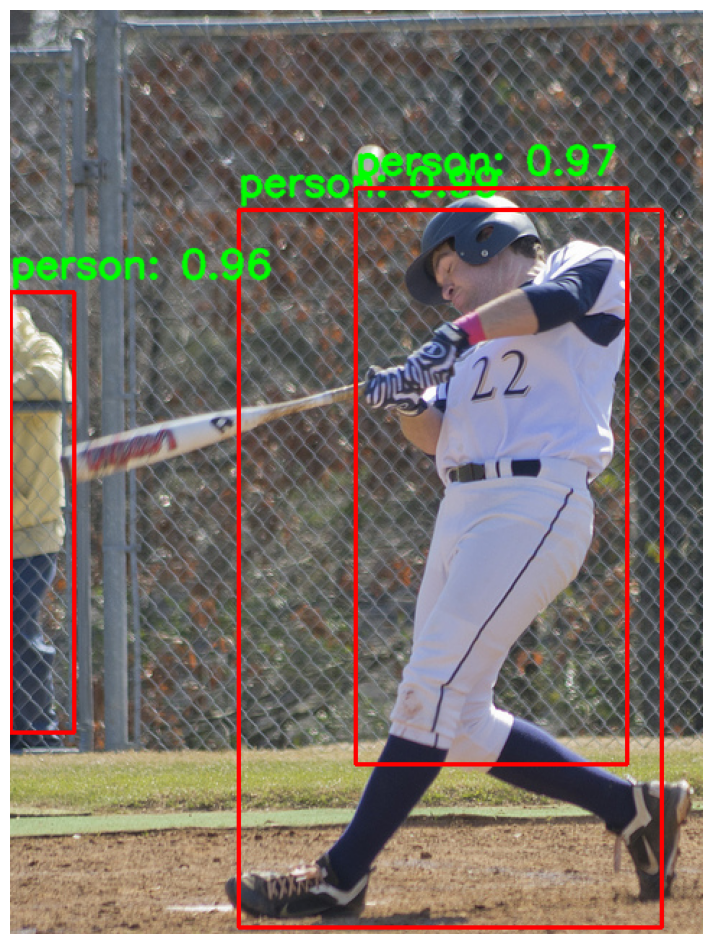

In [23]:
# class names
label_list= ["background","person"]

# Number of classes (include background)
num_classes = 2   # this has to be 4 in normally, but probably because of some labeling issues in anotation process this is 6 for now.

# Load the same model architecture with correct number of classes
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=False, num_classes=num_classes)

"""
Change this to your model path
"""
model.load_state_dict(torch.load(r"/content/model_epoch_5.pth"))
model.eval()

# Load image with OpenCV and convert to RGB
img_path = r"/root/fiftyone/coco-2017/test/data/000000000016.jpg" # CHANGE this to your image path
image_bgr = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(image_rgb)

# Transform image
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image_pil).unsqueeze(0)

# Inference
with torch.no_grad():
    predictions = model(image_tensor)

# Parse predictions
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# Threshold
threshold = 0.8
for i in range(len(boxes)):
    if scores[i] > threshold:
        box = boxes[i].cpu().numpy().astype(int)
        label = label_list[labels[i]]
        score = scores[i].item()

        # draw label and score
        text = f"{label}: {score:.2f}"
        cv2.putText(image_bgr, text, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 255, 0), 2, cv2.LINE_AA)

        # Draw rectangle and label
        cv2.rectangle(image_bgr, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 2)


# Convert BGR to RGB for correct display with matplotlib
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image with larger figure size
plt.figure(figsize=(16, 12))  # Increase size as needed
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

